## 1、聚类算法详解
**聚类**（Clustering）是最常见的无监督学习算法，它指的是按照某个特定标准（如距离）把一个数据集分割成不同的类或簇，使得同一个簇内的数据对象的相似性尽可能大，同时不在同一个簇中的数据对象的差异性也尽可能地大

聚类算法做的事情，就是对无标签的数据， 基于数据分布进行分群分组，使得相似的数据尽量落在同一个簇内

我们先**对比区分一下聚类和分类**：

- 聚类是一种无监督学习，而分类是一种有监督的学习。
- 聚类只需要人工指定相似度的标准和类别数就可以，而分类需要从训练集学习分类的方法。
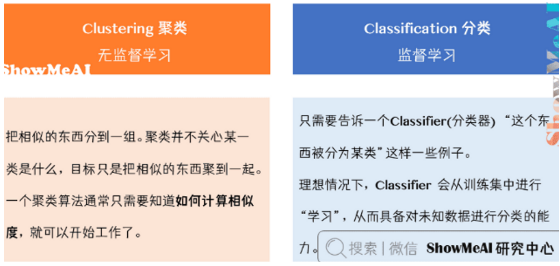

### 1.1案例
将数据点按照距离远近分成3类:
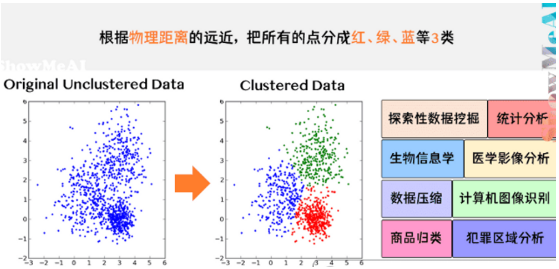

## 2、主流聚类算法
主流的聚类算法可以分成两类：划分聚类（Partitioning Clustering）和层次聚类（Hierarchical Clustering）

**划分聚类算法会给出一系列扁平结构的簇（分开的几个类），它们之间没有任何显式的结构来表明彼此的关联性**。

- 常见算法有 K-Means / K-Medoids、Gaussian Mixture Model （高斯混合模型）、Spectral Clustering（谱聚类）、Centroid-based Clustering等。

**层次聚类会输出一个具有层次结构的簇集合，因此能够比划分聚类输出的无结构簇集合提供更丰富的信息**。层次聚类可以认为是是嵌套的划分聚类。

- 常见算法有 Single-linkage、Complete-linkage、Connectivity-based Clustering等。

后文我们会重点展开讲一下 K-Means 算法、Single-linkage 算法和 Complete-linkage 算法
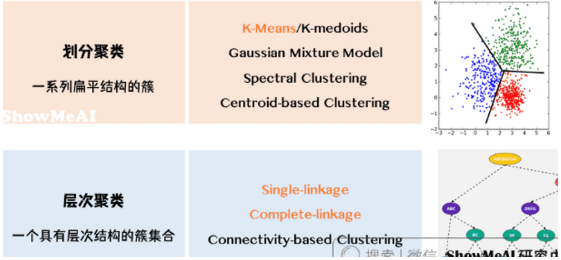

### 2.1 K-Means聚类算法
聚类算法要把 n个数据点按照分布分成 K类（很多算法的K是人为提前设定的）。我们希望通过聚类算法得到 K个中心点，以及每个数据点属于哪个中心点的划分

- 中心点可以通过迭代算法来找到，满足条件：所有的数据点到聚类中心的距离之和是最小的。
- 中心点确定后，每个数据点属于离它最近的中心点。

在进入「**如何寻找中心点**」这个核心问题之前，我们先解决几个小问题：
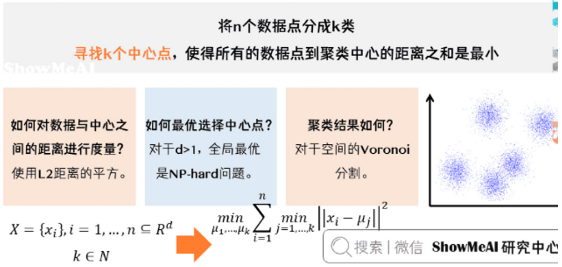

- 1、**数据点到中心点的距离：**我们一般选择几何距离，就是L2距离的平方。

- 2、**中心点是否唯一：对于多个中心点的情况，全局最优是一个相当难的问题。理论上存在一个全局最优解，但是不一定能找到。既然全局最优解不好找，那我们退而求其次，看能不能找到局部最优解**

- 3、**聚类结果如何表示：** 采用空间分割的方式，将空间分割成多个多边形，每个多边形对应一个 cluster中心。

### 2.2 K-Means算法步骤
K-Means 采用 **EM算法** 迭代确定中心点。流程分两步：

- **① 更新中心点**：初始化的时候以随机取点作为起始点；迭代过程中，取同一类的所有数据点的重心（或质心）作为新中心点。
- **② 分配数据点**：把所有的数据点分配到离它最近的中心点。

重复上面的两个步骤，一直到中心点不再改变为止。过程如图所示：
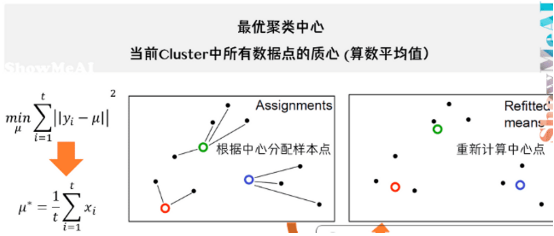

• **左侧Assignments**：一开始随机选取三个点，作为三个类的中心，基于其它点和这三个中心点的距离分配簇；每一类重新计算和分配中心。

• **右侧Refitted Means**：根据新的中心点，重新分配所有的数据点（原来属于绿色中心点的1个点，此次迭代后变成属于红色中心点了）。

下图的示例展示了 K-Means 动态迭代收敛的过程：
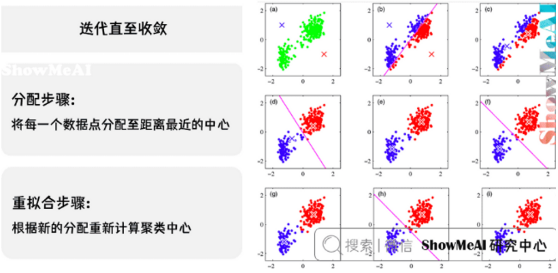

- 图(a)上有一群散落的点，我们设定簇数K=2  。
- 图(b)为随机找2个点作为中心初始化后，第一次分类的结果。
    - 可以看到，红蓝分界线在这群点的中央穿过。这显然有问题，不过没关系，算法继续往下走。对红蓝两类分别计算它们的中心。
- 图(c)可以看到，一个落在左下方这一团里，另一个落在右上方那一团里。以新的中心点进行第二次分类。
- 图(d)的分界线就基本是已经可以把两团分开了。
- 图(f)、(g)显示后续重复计算你「**中心点-分类数据点**」的过程已经收敛，数据点分配基本不动了，聚类完成。


### 2.3.K-Means缺点与改进
我们将 K-Means 算法的一些缺点总结如下：

- **缺点1**：中心点是所有同一类数据点的质心，所以聚类中心点可能不属于数据集的样本点。
- **缺点2**：计算距离时我们用的是L2距离的平方。对离群点很敏感，噪声（Noisy Data）和离群点（Outlier）会把中心点拉偏，甚至改变分割线的位置。

### 2.4、K-Medoids算法（K-Means改进）
针对 K-Means 算法的缺点改进得到了 K-Medoids 算法：

### **（1）限制聚类中心点必须来自数据点。**

- 求中心点的计算方法，由原来的直接计算重心，变成计算完重心后，在重心附近找一个数据点作为新的中心点。
- K-Medoids 重拟合步骤比直接求平均的 K-Means 要复杂一些。

### **（2）为避免平方计算对离群点的敏感，把平方变成绝对值。**

总结来说，K-Medoids 算法的迭代过程与 K-Means 是一致的，不同点如下所示：
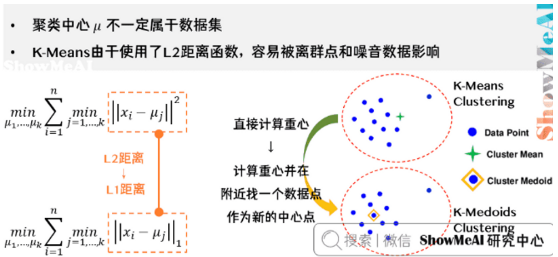

- 起始点不是随机点，而是任意选择数据集中的点。
- 距离使用L1距离，而不是L2距离。
- 新的中心点，也不是同类所有点的重心，而是同一类别所有数据点中，离其它点最近的点。
- 复杂度方面，相比于 K-Means 的 $O(n)$，K-Medoids 更新中心点的复杂度 $O(n^2)$要更高一些。

下图是 K-Means 和 K-Medoids 两个算法的一个系统对比：
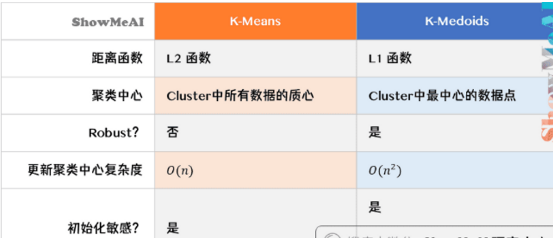

## ****3.层次聚类算法****

### 3.1）层次聚类 vs 划分聚类

层次聚类最后得到的是一个树状层次化结构。
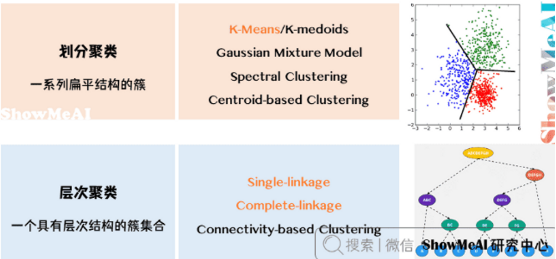

从层次化聚类转换为划分聚类很简单，在层次化聚类的某一层进行切割，就得到1个划分聚类。如下图所示：
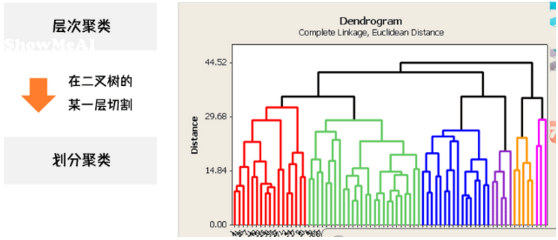

### 3.2）Single-Linkage 算法
这个算法是构造一棵二叉树，用叶节点代表数据，而二叉树的每一个内部节点代表一个聚类。如图所示：
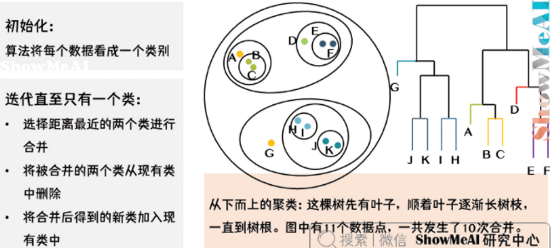

这是一个从下而上的聚类。这棵树是先有叶子，顺着叶子逐渐长树枝，树枝越长越大一直到树根。


### 3.3）Complete-Linkage算法
与 Single-Linkage 算法相似，Complete-Linkage 的迭代思路是一样的，不同的是在合并类时，Single-Linkage 是用两个类中距离最小的两个点作为类之间的距离，而 Complete-Linkage 恰恰相反，用距离最远的两个数据点之间的距离作为这两个类之间的距离

总的来说，层次聚类的计算复杂度是$O(n^3)$级别，算是很高的了。可以用优先队列的数据结构对算法加速，加速后能减低到的级别.
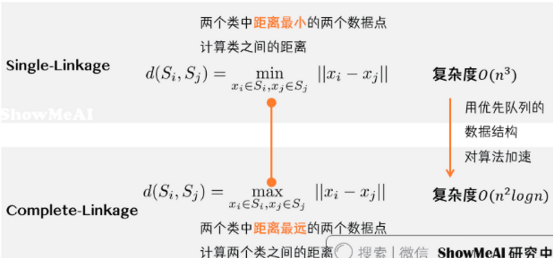

## 4.DB-SCAN算法
### 4.1）DB-SCAN算法

在前面的内容中我们介绍了划分聚类和层次聚类的算法，接下来我们学习另外一个聚类算法：DB-SCAN 算法。

DB-SCAN 是一个基于密度的聚类。如下图中这样不规则形态的点，如果用 K-Means，效果不会很好。而通过 DB-SCAN 就可以很好地把在同一密度区域的点聚在一类中。
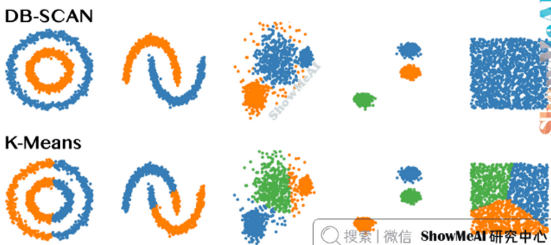

### 4.2）DB-SCAN算法的关键概念

**核心对象**（Core Object），也就是密度达到一定程度的点。

- 若 $x_j$的$\in$邻域至少包含 MinPts 个样本，即$|N_\in(x_j) \ge MinPts|$ ，则  是一个核心对象。

**密度直达**（directly density-reachable），密度可达（density-reachable）：核心对象之间可以是密度直达或者密度可达。

- 若$x_i$位于$x_j$的$\in$邻域中，且$x_j$是核心对象，则称$x_j$由 $x_i$密度直达。
- 对 $x_i$与$x_j$，若存在样本序列$p_1,p_2,…,p_n$，其中$p_1=x_i,p_n=x_j$且$p_{i+1}$由$p_i$密度直达，则称$x_j$由$x_i$密度可达。

**密度相连**（density-connected）：所有密度可达的核心点就构成密度相连。

- 对 $x_i$与$x_j$，若存在$x_k$使得 $x_i$与$x_j$，均由$x_k$密度可达，则称$x_i$与$x_j$密度相连。

我们通过下图深入理解一下：
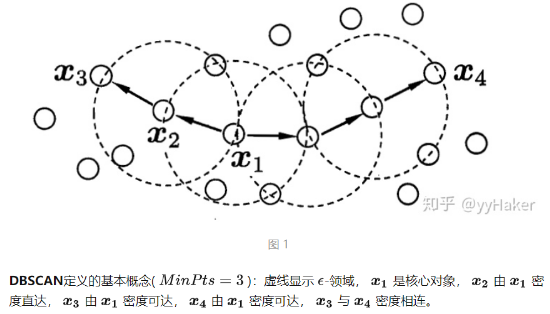

先假设要求的最小点密度 MinPts 是3。

- 在一个半径范围内，$x_1$这个点周围的点数是5，超过了阈值3，所以$x_1$是一个核心对象。同样,$x_2$、$x_3$和$x_4$也是核心对象。
- $x_1$与$x_2$处于一个邻域，所以二者是密度直达的关系，而 $x_3$与 $x_2$也是密度直达的关系，通过 $x_2$、$x_1$与$x_3$是密度可达的关系。
- $x_3$与$x_4$通过多个核心对象实现密度相连。


### 4.3）DB-SCAN算法伪代码
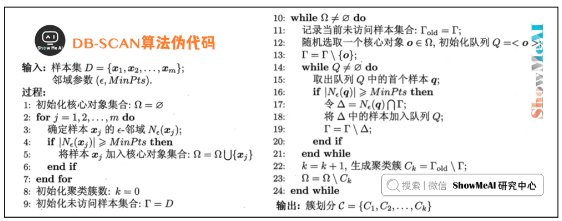
这个过程用直白的语言描述就是：

- 对于一个数据集，先规定最少点密度 MinPts 和半径范围。
- 先找出核心对象：如果在半径范围内点密度大于 MinPts，则这个点是核心对象。把所有的核心对象放到一个集合中。
- 从这个核心对象集合中，随机找一个核心对象，判断其它的数据点与它是否密度直达，如果是，则归入聚类簇中。
- 继续判断其它点与聚类簇中的点是否密度直达，直到把所有的点都检查完毕，这时候归入聚类簇中的所有点是一个密度聚类。

## 5、代码演示-K-means&DB-Scan
- 数据集 iris
- sklearn

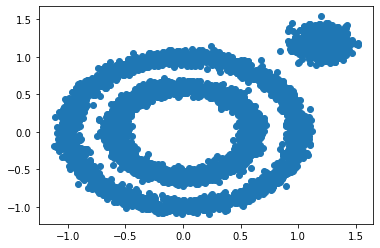

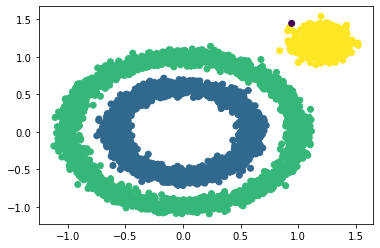

In [8]:
#DBScan
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
%matplotlib inline
X1, y1=datasets.make_circles(n_samples=5000, factor=.6,
                                      noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]],
               random_state=9)

X = np.concatenate((X1, X2))
#展示样本数据分布
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()
#eps和min_samples 需要进行调参
y_pred = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(X)
#分类结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()




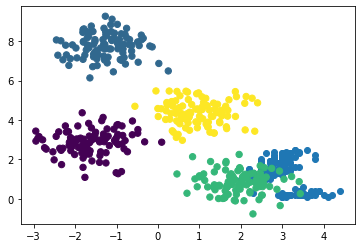

In [5]:
#k-means
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
iris = datasets.load_iris()
X, y = iris.data, iris.target
data = X[:,[1,3]] # 为了便于可视化，只取两个维度
plt.scatter(data[:,0],data[:,1]);


# Generate some data
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
 
# kmeans clustering
kmeans = KMeans(4, random_state=0)
kmeans.fit(X)   # 训练模型
labels = kmeans.predict(X)   # 预测分类
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show()
